# Artificial Neural Network (ANN) model

This is the code for the completed neural network. Throughout this document all the areas are explained in more detail.

In [64]:
class NeuralNetwork(object):
    def __init__(self):
        # Define Hyperparameters
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)        
    
    def forwardPropagation(self, X):
        # Propagate inputs through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self, z):
        return np.exp(-z)/((1+np.exp(-z))**2)

## Problem

Suppose we want to predict our test score based on how many hours we sleep and how many hours we study the night before. In other words, we want to predict the output value $y$ which are scores for a set of input values $X$ which are hours of (sleep, study).

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [5]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [6]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

This is a supervised regression problem. It's supervised because our examples have outputs($y$). It's regression because we're predicting the the test score, which is a continuous output.

We want to scale the data so the result is in the interval $[0,1]$.

In [7]:
X = X/np.amax(X, axis=0)
y = y/100 # Max test score is 100

In [8]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [9]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

Now we can start building the neural network. It will have 2 inputs($X$) and 1 output($y$). We call our output $\hat{y}$ because it is an estimate of $y$. We will be using a hidden later with 3 neurons. Finally, we will be using sigmoid activation functions.

## Forward Propagation

### Variables

|Code symbol|Math symbol|Definition|Dimensions|
|--|--|--|--|
|X|$X$|Input Data, each row in an example|(numExamples, inputLayerSize)|
|y|$y$|Target data|(numExamples, outputLayerSize)|
|W1|$W^{(1)}$|Layer 1 Weights|(inputLayerSize, hiddenLayerSize)|
|W2|$W^{(2)}$|Layer 2 Weights|(hiddenLayerSize, outputLayerSize)|
|z2|$z^{(2)}$|Layer 2 Activation|(numExamples, hiddenLayerSize)|
|a2|$z^{(2)}$|Layer 2 Activity|(numExamples, hiddenLayerSize)|
|z3|$z^{(2)}$|Layer 3 Activation|(numExamples, outputLayerSize)|

$$
\begin{align}
z^{(2)} &= XW^{(1)} \\
a^{(2)} &= f(z^{(2)}) \\
z^{(3)} &= a^{(3)}W^{(2)} \\
\hat{y} &= f(z^{(3)})
\end{align}
$$

Each input value in matrix $X$ should be multiplied by a corresponding weight and then added together with all the other results for each neuron.

$z^{(2)}$ is the activity of our second layer and it can be calculated as the following:

$$
z^{(2)} = XW^{(1)} = \begin{bmatrix}
        3 & 5  \\
        5 & 1  \\
        10 & 2  
\end{bmatrix}
\begin{bmatrix}
        W_{11}^{(1)} & W_{12}^{(1)}  & W_{13}^{(1)}\\
        W_{21}^{(1)} & W_{22}^{(1)}  & W_{23}^{(1)}  
\end{bmatrix} = \begin{bmatrix}
3 W_{11}^{(1)} + 5 W_{21}^{(1)} & 3 W_{12}^{(1)} + 5 W_{22}^{(1)} & 3 W_{13}^{(1)} + 5 W_{23}^{(1)} \\
5 W_{11}^{(1)} +  W_{21}^{(1)} & 5 W_{12}^{(1)} +  W_{22}^{(1)} & 5 W_{13}^{(1)} + W_{23}^{(1)} \\
10 W_{11}^{(1)} + 2 W_{21}^{(1)} & 10 W_{12}^{(1)} + 2 W_{22}^{(1)} & 10 W_{13}^{(1)} + 2 W_{23}^{(1)} 
\end{bmatrix}
$$

Note that each entry in $z$ is a sum of weighted inputs to each hidden neuron. $z$ is a $3\times 3$ matrix, one row for each sample, and one column for each hidden unit.

### Activation function - Sigmoid

Now that we have the activities for our second layer, $z^{(2)} = XW^{(1)}$, we need to apply the activation function. We'll independently apply the sigmoid function to each entry in the matrix $z$.

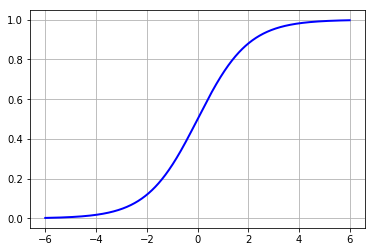

In [75]:
NN = NeuralNetwork()
testInput = np.arange(-6,6,0.01)
plot(testInput, NN.sigmoid(testInput), color='b', lineWidth=2)
grid(1)

Let's see how the sigmoid() takes an input and returns the result:

In [11]:
NN.sigmoid(1)

0.7310585786300049

In [12]:
NN.sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

In [13]:
NN.sigmoid(np.random.randn(3,3))

array([[ 0.21802553,  0.76343508,  0.56604093],
       [ 0.80182811,  0.11230011,  0.32035148],
       [ 0.50937793,  0.47449956,  0.55781643]])

### Weight-matrices $W^{(1)}$ and $W^{(2)}$

These are initialized in the \__init__\() method with random numbers.

### Implementing forward propagation

Using our activation function $f$, we can write that our second layer activity $a^{(2)} = f(z^{(2)})$. The $a^{(2)}$ will be a matrix of the same size ($3 \times 3$).

To finish forward propagation we want to propagate $a^{(2)}$ all the way to the output $\hat{y}$.

All we have to do now is multiply $a^{(2)}$ by our second layer weights $W^{(2)}$ and apply on more activation function. The $W^{(2)}$ will be of size $3 \times 1$, one weight for each synapse:

$$z^{(3)}=a^{(2)}W^{(2)}$$

Multiplying $a^{(2)}$, a ($3 \times 3$ matrix), by $W^{(2)}$, a ($3 \times 1$ matrix) results in a $3 \times 1$ matrix $z^{(3)}$, the activity of our 3rd layer. The $z^{(3)}$ has three activity values, one for each sample.

Then we'll apply our activation function to $z^{(3)}$ yielding our estimate of test score, $\hat{y}$:

$$\hat{y}=f(z^{(3)})$$

### Getting an estimate of test score

Now we have a class capable of estimating our test score given how many hours we sleep and how many hours we study.

In [14]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [56]:
NN = NeuralNetwork()
yHat = NN.forwardPropagation(X)

In [57]:
yHat

array([[ 0.48121278],
       [ 0.35868875],
       [ 0.28271806]])

In [58]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

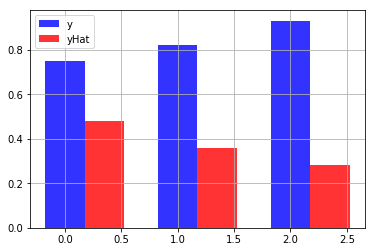

In [60]:
bar([0,1,2], y, width=0.35, alpha=0.8, color='b')
bar([0.35,1.35,2.35], yHat, width=0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat']);

We can see that our predictions $\hat{y}$ are pretty inaccurate.

## Gradient Descent

### Cost function $J$

To improve our model, we need to find a way of quantifying exactly how wrong our predictions are. One way of doing it is to use a cost function. For a given sample, a cost function tells us how costly or model is.

We'll use sum of square errors to compute an overall cost and we'll try to minimize it. Actually, training a network means minimizing a cost functions:

$$J = \sum\limits_{i=1}^N(y_i-\hat{y}_i)$$

where $N$ is the number of training samples. We can make $J$ as small as possible with a optimal combination of the weights.

### Curse of dimensionality

Suppose we want to find the optimal weight value for one weight:

In [20]:
import time
weightToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightToTry[i]
    yHat = NN.forwardPropagation(X)
    costs[i] = 0.5*sum((y-yHat)**2)
endTime = time.clock()

In [21]:
elapsedTime = endTime - startTime
elapsedTime

0.026310512359392284

It took about 0.03 seconds to check 1000 different weight values for our neural network. 

Here is the plot for the 1000 weights:

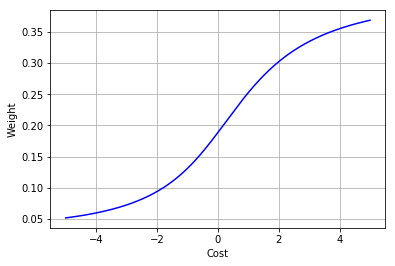

In [22]:
plot(weightToTry, costs, color='b')
grid(1)
xlabel('Cost')
ylabel('Weight')

If we want to optimize 2 weights it will take 1000\*1000 iterations to check all the values. If we want to check all the weights it will take:

In [23]:
elapsedTime*(1000**(9-1))/(3600*24*365)/1000

834300873902.5966

almost 1 trillion milleniums. Needless to say, this is infeasible.

### Gradient descent method

There are two methods for the gradient descent: batch (standard) or stochastic. We're going to use the batch to train our neural network.

In batch gradient descent method sums up all the derivatives of $J$ for all samples:

$$ \sum\frac{dJ}{dW} $$

## Backpropagation of Errors

Backpropagation (backward propagation of errors) is an algorithm used to train artificial neural networks, it can update the weights very efficiently.

Basically, backpropagation is just a very computationally efficient approach to compute the derivates of a complex cost function and our goal is to use those derivaties to determine the weight coefficients for parameterizing a multi-layer neural network.

In other words, the method calculates the gradient ($\frac{dJ}{dW}$) of a cost (loss or objective) function with respect to all the weights in the network, so that the gradient is fed to the gradient descent method which in turn uses it to update the weights in order to minimize the cost function.

Since backpropagation requires a known, target data for each input value in order to calculate the cost function gradient, it is usually used in supervised networks.

This will require additional variables, so our table now becomes:

|Code symbol|Math symbol|Definition|Dimensions|
|--|--|--|--|
|X|$X$|Input Data, each row in an example|(numExamples, inputLayerSize)|
|y|$y$|Target data|(numExamples, outputLayerSize)|
|W1|$W^{(1)}$|Layer 1 Weights|(inputLayerSize, hiddenLayerSize)|
|W2|$W^{(2)}$|Layer 2 Weights|(hiddenLayerSize, outputLayerSize)|
|z2|$z^{(2)}$|Layer 2 Activation|(numExamples, hiddenLayerSize)|
|a2|$z^{(2)}$|Layer 2 Activity|(numExamples, hiddenLayerSize)|
|z3|$z^{(2)}$|Layer 3 Activation|(numExamples, outputLayerSize)|
|J|$J$|Cost|(1, outputLayerSize)|
|dJdz3|$\frac{\partial J}{\partial z^{(3)}}$|Partial derivative of cost with respect to $z^{(3)}$|(numExamples, outputLayerSize)|
|dJdW2|$\frac{\partial J}{\partial W^{(2)}}$|Partial derivative of cost with respect to $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$\frac{\partial z^{(3)}}{\partial z^{(2)}}$|Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$|(numExamples, hiddenLayerSize)|
|dJdW1|$\frac{\partial J}{\partial W^{(1)}}$|Partial derivative of cost with respect to $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
|delta2|$\delta^{(2)}$|Backpropagating Error 2|(numExamples, hiddenLayerSize)|
|delta3|$\delta^{(3)}$|Backpropagating Error 3|(numExamples, outputLayerSize)|

### Computing gradient $\frac{dJ}{dW}$

We have a hidden layer and an output layer. So, we need to compute two gradients overall: $\frac{\partial J}{\partial W^{(1)}}$, and $\frac{\partial J}{\partial W^{(2)}}$, the gradient with respect to the weight for the hidden layer, and the gradient with respect to the weight for the output later, respectively.

A way of quantifying exactly how wrong (or correct) our predictions are is by using a cost function.

We'll use sum of square errors, the difference between target (known) data and the value estimated by our network to compute an overall cost and we'll try to minimize it. the cost function is:

$$J=\frac{1}{2}\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2$$

where $N$ is the number of training samples. Here, the $J$ is the error of the network for a single training iteration. Note that $\sum$ is required for our batch gradient descent algorithm.

To perform gradient descent, we need an equation and some code for our gradient $\frac{dJ}{dW}$.

We'll seperate our $\frac{dJ}{dW}$ computation by computing $\frac{\partial J}{\partial W^{(1)}}$, and $\frac{\partial J}{\partial W^{(2)}}$ independently.

Let's work on $\frac{\partial J}{\partial W^{(2)}}$ first, which is for the output layer.

The sum in our cost function adds the error from each sample to create our overall cost. We'll take advantage of the sum rule in differentiation. We can move our $\sum$ outside and worry about the derivative of the inside expression first:

$$\frac{\partial J}{\partial W^{(2)}} = \frac{\partial(\sum \frac{1}{2}(y-\hat{y})^2)}{\partial W^{(2)}} = \sum \frac{\partial(\frac{1}{2}(y-\hat{y})^2)}{\partial W^{(2)}}$$

Unlike $\hat{y}$ which depends on $W^{(2)}$, $y$ is constant. So, $\frac{\partial y}{\partial W^{(2)}}=0$, and we have the following:

$$\frac{\partial J}{\partial W^{(2)}}=-\sum(y-\hat{y})\frac{\partial\hat{y}}{\partial W^{(2)}}$$

We now need to think about the derivative of $\frac{\partial\hat{y}}{\partial W^{(2)}}$. From our earlier equation $$\hat{y}=f(z^{(3)})$$

we know that $\hat{y}$ is our activation function of $z^{(3)}$, so we may want to apply the chain rule again to break $\frac{\partial\hat{y}}{\partial W^{(2)}}$ into $\frac{\partial\hat{y}}{\partial z^{(3)}}$ times $\frac{\partial z^{(3)}}{\partial W^{(2)}}$:

$$\frac{\partial J}{\partial W^{(2)}} = -\sum (y-\hat{y}) \frac{\partial\hat{y}}{\partial z^{(3)}} \frac{\partial z^{(3)}}{\partial W^{(2)}}$$.

To keep things simple, we'll drop our summation. Once we've computed $\frac{\partial J}{\partial W}$ for a single sample, we'll add up all our individual derivative terms.

To find the rate of change of $\hat{y}$ with respect to $z^{(3)}$, we need to differentiate our sigmoid activation function with respect to $z$:

$$f(z) = \frac {1}{1+e^{-z}}$$

$$f^\prime(z) = \frac {e^{-z}} {(1+e^{-z})^2}$$


### Code for sigmoid prime $f'(z)$

The code for the sigmoid prime function will be:

In [63]:
def sigmoidPrime(self, z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Now the function will look like this:

In [67]:
NN = NeuralNetwork()

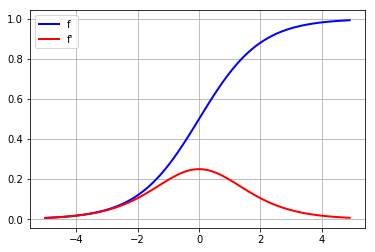

In [74]:
sigTestValues = np.arange(-5,5,0.1)
plot(sigTestValues, NN.sigmoid(sigTestValues), linewidth=2, color='b')
plot(sigTestValues, NN.sigmoidPrime(sigTestValues), linewidth=2, color='r')
grid(1)
legend(['f', "f'"]);

### Backpropagation Errors ($\delta$)

http://www.bogotobogo.com/python/scikit-learn/Artificial-Neural-Network-ANN-4-Backpropagation.php